# British Airways

# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/BA_reviews.csv')
df.reset_index(drop=True, inplace=True)
print(df['reviews'])

0      ✅ Trip Verified |  My family and I have flown ...
1      ✅ Trip Verified |  This has been by far the wo...
2      ✅ Trip Verified |  In Nov 2022 I booked and pa...
3      Not Verified | BA is not treating its premium ...
4      ✅ Trip Verified |  24 hours before our departu...
                             ...                        
995    Not Verified |  Glasgow to Miami via London. G...
996    ✅ Trip Verified |  London Heathrow to Budapest...
997    ✅ Trip Verified |  Budapest to London Heathrow...
998    ✅ Trip Verified |  London to Toronto. Group of...
999    ✅ Trip Verified |  Madrid to Heathrow. I fly w...
Name: reviews, Length: 1000, dtype: object


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
        Unnamed: 0
count  1000.000000
mean    499.500000
std     288.819436
min       0.000000
25%     249.750000
50%     499.500000
75%     749.250000
max     999.000000


There are no null values/ missing values in out dataset. The dataset contains 1000 unique entries. We will remove (✅ Trip Verified | and Not Verified | ) to clean the data. We will also remove any leading or trailing spaces. And turn the review string to all lower case.

In [4]:
df['reviews'] = df['reviews'].str.strip()
df['reviews']=df['reviews'].str.lstrip('✅ Trip Verified |')
df['reviews']=df['reviews'].str.lstrip('Not Verified |')
df['reviews']= df['reviews'].str.lower()
print(df)

     Unnamed: 0                                            reviews
0             0  my family and i have flown mostly on british a...
1             1  his has been by far the worst service i have h...
2             2  in nov 2022 i booked and paid for a return jou...
3             3  ba is not treating its premium economy passeng...
4             4  24 hours before our departure on ba059 to cape...
..          ...                                                ...
995         995  glasgow to miami via london. glasgow to heathr...
996         996  london heathrow to budapest. after so much dis...
997         997  budapest to london heathrow. the flight depart...
998         998  london to toronto. group of 10 people age from...
999         999  madrid to heathrow. i fly with ba on a regular...

[1000 rows x 2 columns]


In [5]:
import string

df['reviews'] = df['reviews'].str.replace('[{}]'.format(string.punctuation), '')
print(df['reviews'])

0      my family and i have flown mostly on british a...
1      his has been by far the worst service i have h...
2      in nov 2022 i booked and paid for a return jou...
3      ba is not treating its premium economy passeng...
4      24 hours before our departure on ba059 to cape...
                             ...                        
995    glasgow to miami via london glasgow to heathro...
996    london heathrow to budapest after so much disa...
997    budapest to london heathrow the flight departe...
998    london to toronto group of 10 people age from ...
999    madrid to heathrow i fly with ba on a regular ...
Name: reviews, Length: 1000, dtype: object


In [6]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the 'punkt' resource

df['tokenized_reviews'] = df['reviews'].apply(word_tokenize)
df['tokenized_reviews']

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0      [my, family, and, i, have, flown, mostly, on, ...
1      [his, has, been, by, far, the, worst, service,...
2      [in, nov, 2022, i, booked, and, paid, for, a, ...
3      [ba, is, not, treating, its, premium, economy,...
4      [24, hours, before, our, departure, on, ba059,...
                             ...                        
995    [glasgow, to, miami, via, london, glasgow, to,...
996    [london, heathrow, to, budapest, after, so, mu...
997    [budapest, to, london, heathrow, the, flight, ...
998    [london, to, toronto, group, of, 10, people, a...
999    [madrid, to, heathrow, i, fly, with, ba, on, a...
Name: tokenized_reviews, Length: 1000, dtype: object

In [7]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

nltk.download('averaged_perceptron_tagger')  # Download the 'averaged_perceptron_tagger' resource
nltk.download('wordnet')  # Download the 'wordnet' resource
nltk.download('omw-1.4')  # Download the 'omw-1.4' resource

# Function to convert POS tags to WordNet tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Perform POS tagging
df['pos_tagged_reviews'] = df['tokenized_reviews'].apply(pos_tag)

# Perform lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_reviews'] = df['pos_tagged_reviews'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in x])

df['lemmatized_reviews']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /home/repl/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/repl/nltk_data...


0      [my, family, and, i, have, fly, mostly, on, br...
1      [his, have, be, by, far, the, bad, service, i,...
2      [in, nov, 2022, i, book, and, pay, for, a, ret...
3      [ba, be, not, treat, it, premium, economy, pas...
4      [24, hour, before, our, departure, on, ba059, ...
                             ...                        
995    [glasgow, to, miami, via, london, glasgow, to,...
996    [london, heathrow, to, budapest, after, so, mu...
997    [budapest, to, london, heathrow, the, flight, ...
998    [london, to, toronto, group, of, 10, people, a...
999    [madrid, to, heathrow, i, fly, with, ba, on, a...
Name: lemmatized_reviews, Length: 1000, dtype: object

In [8]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the 'stopwords' resource

stop_words = set(stopwords.words('english'))

df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokenized_reviews'].head(20)

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0     [family, flown, mostly, british, airways, last...
1     [far, worst, service, plane, obvious, flying, ...
2     [nov, 2022, booked, paid, return, journey, new...
3     [ba, treating, premium, economy, passengers, r...
4     [24, hours, departure, ba059, cape, town, heat...
5     [arrived, heathrow, 0600, find, flight, ibiza,...
6     [original, flight, cancelled, explanation, rep...
7     [airport, check, functionary, little, warmth, ...
8     [flight, fine, inline, competitors, pleasant, ...
9     [came, glasgow, london, took, connecting, flig...
10    [flight, 12, may, 2023, got, delayed, hour, 25...
11    [cairo, 5, hour, flight, ba, considers, short,...
12    [travelling, london, madrid, british, airways,...
13    [luggage, mistagged, dallas, way, cairo, via, ...
14    [airline, lost, luggage, absolutely, awful, th...
15    [booked, ba, website, round, trip, flights, se...
16    [first, time, flying, ba, business, class, nev...
17    [buy, sandwiches, crisps, dont, expect, ho

In [9]:
from textblob import TextBlob

df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_tag'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
df[['reviews', 'polarity', 'sentiment_tag']]

,reviews,polarity,sentiment_tag
0,my family and i have flown mostly on british a...,0.125269,positive
1,his has been by far the worst service i have h...,-0.074519,negative
2,in nov 2022 i booked and paid for a return jou...,0.080073,positive
3,ba is not treating its premium economy passeng...,0.000000,neutral
4,24 hours before our departure on ba059 to cape...,-0.032217,negative
...,...,...,...
995,glasgow to miami via london glasgow to heathro...,0.173299,positive
996,london heathrow to budapest after so much disa...,0.093750,positive
997,budapest to london heathrow the flight departe...,0.037500,positive
998,london to toronto group of 10 people age from ...,0.237941,positive


In [10]:
# Calculate the percentage of various types of tags
tag_counts = df['sentiment_tag'].value_counts()
tag_percentages = tag_counts / len(df) * 100

tag_percentages

positive    65.0
negative    34.0
neutral      1.0
Name: sentiment_tag, dtype: float64

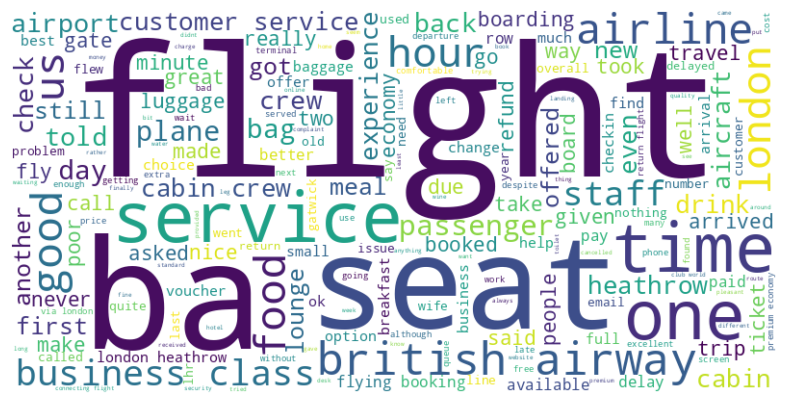

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokenized reviews into a single string
all_reviews = ' '.join(df['tokenized_reviews'].apply(lambda x: ' '.join(x)))

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

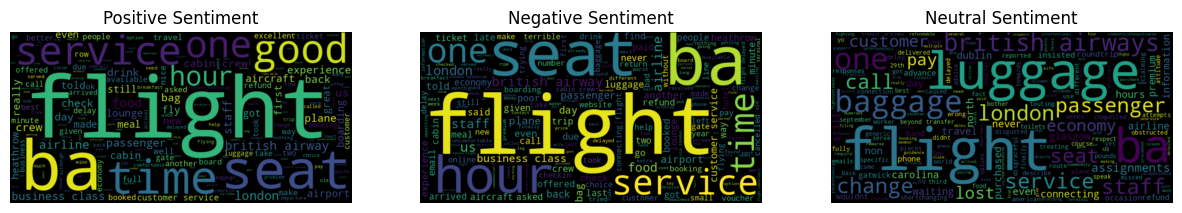

In [12]:


# Create a word cloud for positive sentiment
positive_reviews = ' '.join(df[df['sentiment_tag'] == 'positive']['tokenized_reviews'].apply(lambda x: ' '.join(x)))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_reviews)

# Create a word cloud for negative sentiment
negative_reviews = ' '.join(df[df['sentiment_tag'] == 'negative']['tokenized_reviews'].apply(lambda x: ' '.join(x)))
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Create a word cloud for neutral sentiment
neutral_reviews = ' '.join(df[df['sentiment_tag'] == 'neutral']['tokenized_reviews'].apply(lambda x: ' '.join(x)))
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_reviews)

# Plot the word clouds
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Sentiment')
axes[0].axis('off')
axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Sentiment')
axes[1].axis('off')
axes[2].imshow(neutral_wordcloud, interpolation='bilinear')
axes[2].set_title('Neutral Sentiment')
axes[2].axis('off')

plt.show()

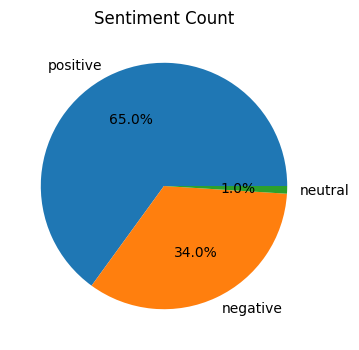

In [13]:
# Count the number of reviews for each sentiment
sentiment_count = df['sentiment_tag'].value_counts()

# Plot a pie chart to show the number of reviews for each sentiment
plt.figure(figsize=(6, 4))
plt.pie(sentiment_count.values, labels=sentiment_count.index, autopct='%1.1f%%')
plt.title('Sentiment Count')
plt.show()

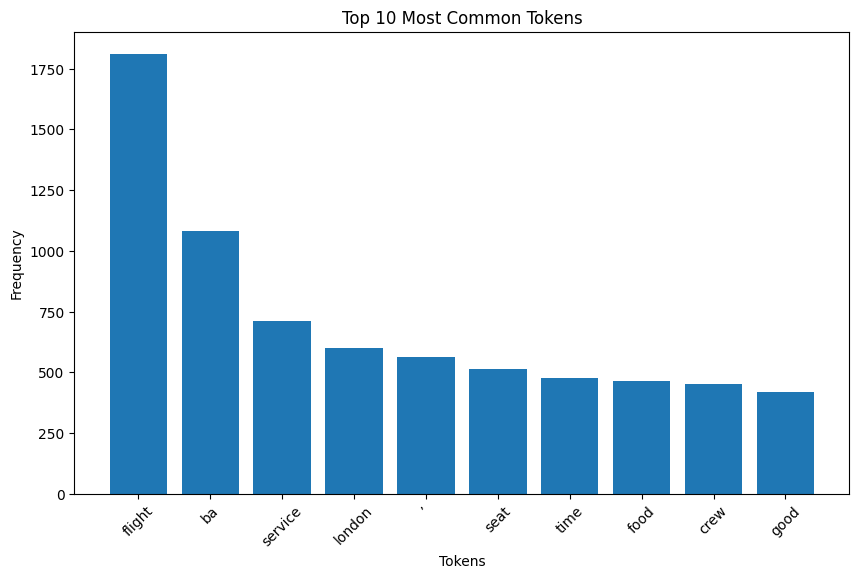

In [14]:
# Create a frequency chart from the reviews
from collections import Counter

# Tokenize the reviews
tokenized_reviews = df['tokenized_reviews'].tolist()
tokens = [token for review in tokenized_reviews for token in review]

# Count the frequency of each token
token_frequency = Counter(tokens)

# Get the most common tokens and their frequencies
most_common_tokens = token_frequency.most_common(10)

# Extract the tokens and frequencies
tokens = [token for token, frequency in most_common_tokens]
frequencies = [frequency for token, frequency in most_common_tokens]

# Plot the frequency chart
plt.figure(figsize=(10, 6))
plt.bar(tokens, frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Tokens')
plt.xticks(rotation=45)
plt.show()